In [433]:
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import numpy as np
import re

In [434]:
doc = ET.parse("ex.xml")
a = doc.getroot()
s = a.find('{urn:hl7-org:v3}component')

In [435]:
def konvert_in_arr(rez):
    sign = False
    tmp = False
    extra = False
    Ecg_dat = 0
    data = []
    for i in rez:
        if (i != ' ' and i != '\n' and i != '-'):
            Ecg_dat = int(i) + Ecg_dat * 10
            extra = True
            continue
        if (i == '-'):
            sign = True
        elif (i == ' ' and tmp == True):
            if (sign == True):
                data = np.append(data, Ecg_dat*(-1))
            else:
                if (extra):
                    data = np.append(data, Ecg_dat)
            Ecg_dat = 0
            tmp = True
            extra = False
            sign = False
        elif (i == '\n' and tmp == True):
            if (sign == True):
                data = np.append(data, Ecg_dat*(-1))
            else:
                data = np.append(data, Ecg_dat)
            Ecg_dat = 0
            tmp = True
            extra = False
            sign = False
        elif (i == ' ' and tmp == False):
            tmp = True
    return data

In [450]:
def lead(n):
    f = s[0][8][0][n][0][1][2]
    rez = f.text
    data = konvert_in_arr(rez)
    g = s[0][8][0][n][0][0].attrib
    name_lead = g.get('code')
    plt.plot(data1,data)
    plt.figure(figsize=(12,12))
    plt.show()
    plt.legend()
    plt.xlabel(name_lead, size = 12)
    plt.grid(True)
    return data

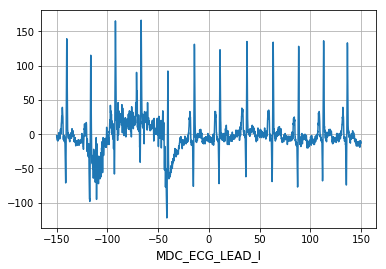

In [451]:
lead_1 = lead(1)

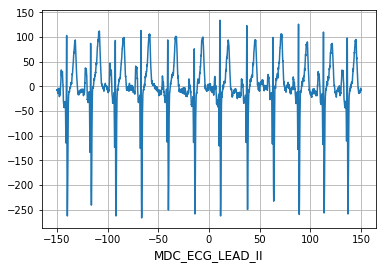

In [394]:
lead_2 = lead(2)

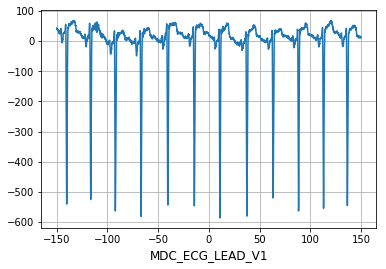

In [396]:
lead_v1 = lead(3)

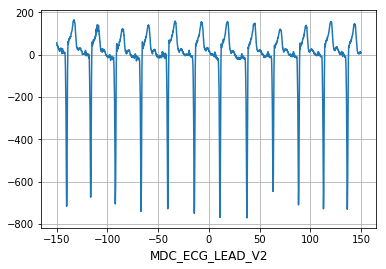

In [398]:
lead_v2 = lead(4)

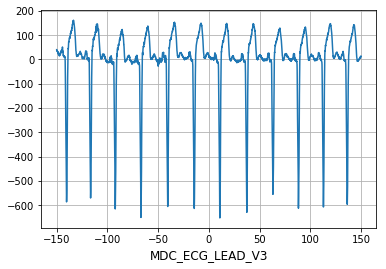

In [406]:
lead_v3 = lead(5)

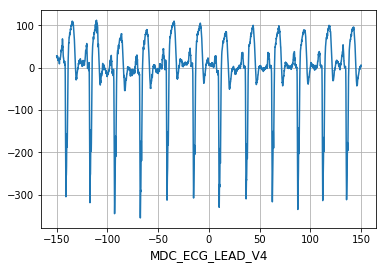

In [404]:
lead_v4 = lead(6)

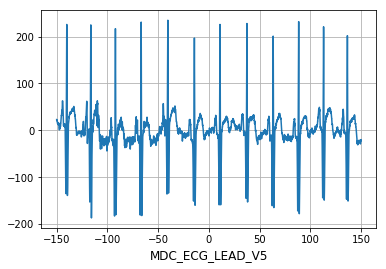

In [408]:
lead_v5 = lead(7)

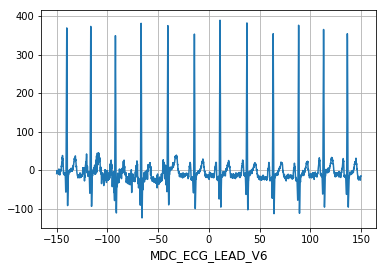

In [410]:
lead_v6 = lead(8)

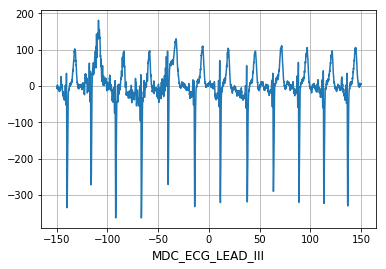

In [412]:
lead_3 = lead(9)

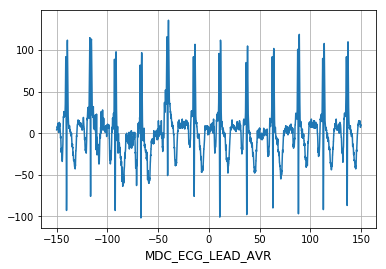

In [414]:
lead_avr = lead(10)

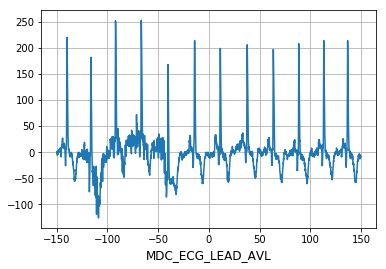

In [416]:
lead_avl = lead(11)

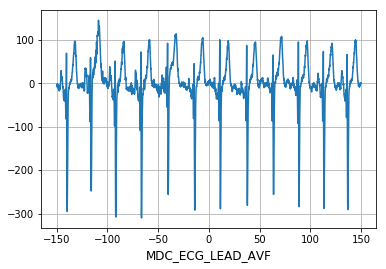

In [418]:
lead_avf = lead(12)

In [459]:
def add_lead_in_xml(lead, n):
    new = ET.parse("empty.xml")
    rr = new.getroot()
    ss = rr.find('{urn:hl7-org:v3}component')
    ff = ss[0][8][0][n][0][1][2]
    ff.text = lead